# importing Lib and data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import statsmodels.api as sm
warnings.filterwarnings("ignore")

In [2]:
df= pd.read_csv("/kaggle/input/telco-customer-churn/Telco-Customer-Churn.csv")

# Analysing the Data

In [3]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [5]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [6]:
df=df.query("Contract == 'Month-to-month'")

# Basic EDA

<Axes: xlabel='Churn'>

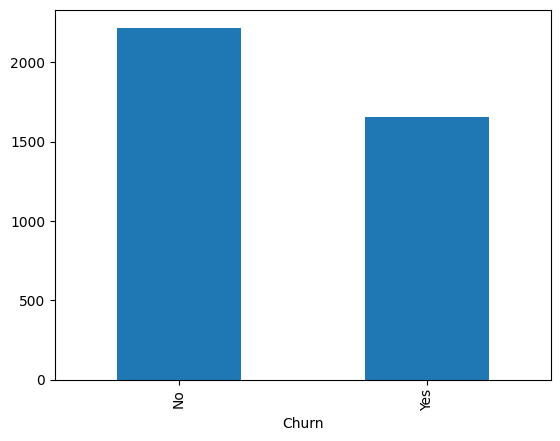

In [7]:
df["Churn"].value_counts().plot(kind="bar")

Text(0.5, 1.0, 'Inspect MonthlyCharges')

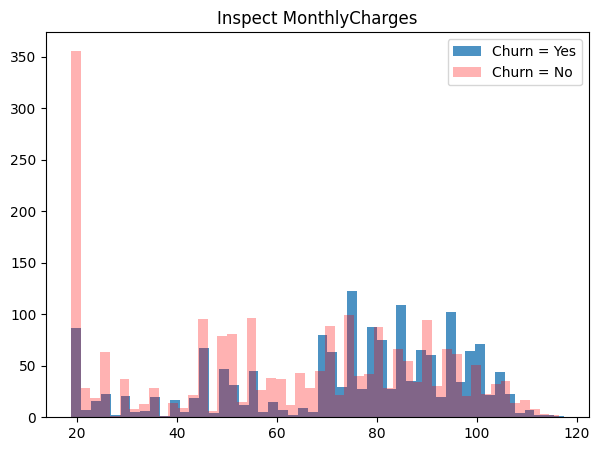

In [8]:
plt.figure(figsize =(7,5))
plt.hist(df.query("Churn == 'Yes'")['MonthlyCharges'],50, alpha= 0.8,label='Churn = Yes')
plt.hist(df.query("Churn == 'No'")['MonthlyCharges'],50, alpha= 0.3,label='Churn = No',color='red')
plt.legend()
plt.title("Inspect MonthlyCharges")

Text(0.5, 1.0, 'Inspect tenure')

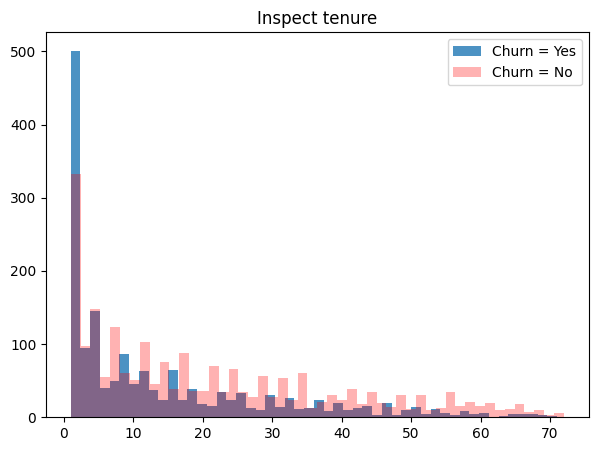

In [9]:
plt.figure(figsize =(7,5))
plt.hist(df.query("Churn == 'Yes'")['tenure'],50, alpha= 0.8,label='Churn = Yes')
plt.hist(df.query("Churn == 'No'")['tenure'],50, alpha= 0.3,label='Churn = No',color='red')
plt.legend()
plt.title("Inspect tenure")

Text(0.5, 1.0, 'Inspect Partner')

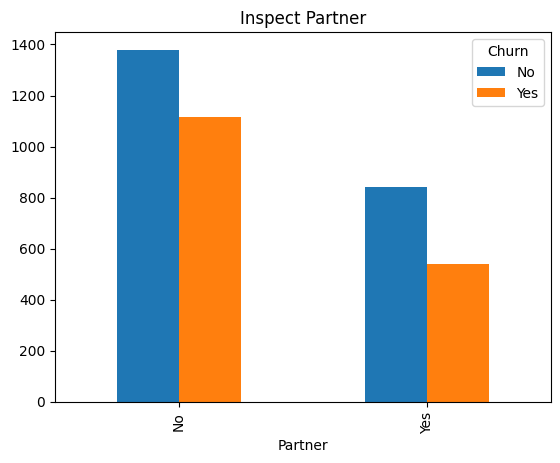

In [10]:
pd.crosstab(df['Partner'], df['Churn']).plot(kind="bar")
plt.title("Inspect Partner")

<Axes: xlabel='Partner'>

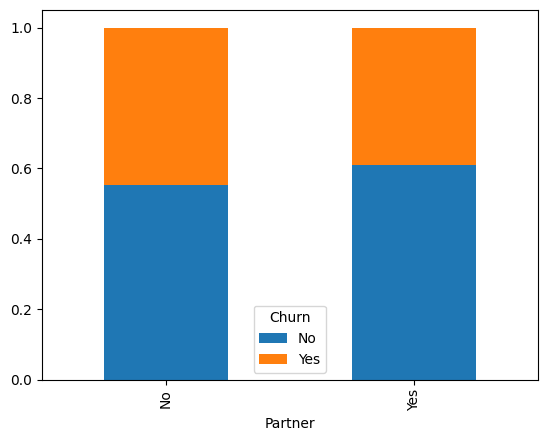

In [11]:
pd.crosstab(df['Partner'], df['Churn'],normalize='index').plot(kind="bar", stacked = True)

# Modeling

In [12]:
X = df.loc[:,['MonthlyCharges', 'tenure', 'Partner', 'SeniorCitizen']]

In [13]:
X = sm.add_constant(X);

In [14]:
print(X)

      const  MonthlyCharges  tenure Partner  SeniorCitizen
0       1.0           29.85       1     Yes              0
2       1.0           53.85       2      No              0
4       1.0           70.70       2      No              0
5       1.0           99.65       8      No              0
6       1.0           89.10      22      No              0
...     ...             ...     ...     ...            ...
7033    1.0           69.50      38      No              0
7034    1.0          102.95      67      No              0
7035    1.0           78.70      19      No              0
7040    1.0           29.60      11     Yes              0
7041    1.0           74.40       4     Yes              1

[3875 rows x 5 columns]


In [15]:
X['Partner']=X["Partner"].map(dict(Yes=1,No=0))

In [16]:
print(X)

      const  MonthlyCharges  tenure  Partner  SeniorCitizen
0       1.0           29.85       1        1              0
2       1.0           53.85       2        0              0
4       1.0           70.70       2        0              0
5       1.0           99.65       8        0              0
6       1.0           89.10      22        0              0
...     ...             ...     ...      ...            ...
7033    1.0           69.50      38        0              0
7034    1.0          102.95      67        0              0
7035    1.0           78.70      19        0              0
7040    1.0           29.60      11        1              0
7041    1.0           74.40       4        1              1

[3875 rows x 5 columns]


In [17]:
y= df["Churn"]

In [18]:
y.value_counts()

Churn
No     2220
Yes    1655
Name: count, dtype: int64

In [19]:
y = y.map(dict(Yes=1, No=0))

In [20]:
model = sm.Logit(y, X)
res = model.fit()

Optimization terminated successfully.
         Current function value: 0.606712
         Iterations 5


In [21]:
print(res.summary())


                           Logit Regression Results                           
Dep. Variable:                  Churn   No. Observations:                 3875
Model:                          Logit   Df Residuals:                     3870
Method:                           MLE   Df Model:                            4
Date:                Sun, 30 Jun 2024   Pseudo R-squ.:                  0.1110
Time:                        19:34:02   Log-Likelihood:                -2351.0
converged:                       True   LL-Null:                       -2644.6
Covariance Type:            nonrobust   LLR p-value:                9.152e-126
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
const             -1.4356      0.100    -14.359      0.000      -1.632      -1.240
MonthlyCharges     0.0265      0.002     17.281      0.000       0.023       0.029
tenure            -0.0431      0.002

In [22]:
res.predict(X)

0       0.325235
2       0.475677
4       0.586221
5       0.701700
6       0.493134
          ...   
7033    0.225133
7034    0.167721
7035    0.456809
7040    0.237268
7041    0.706326
Length: 3875, dtype: float64

In [23]:
y_hat = (res.predict(X) >= 0.5).astype(int)

In [24]:
y_hat

0       0
2       0
4       1
5       1
6       0
       ..
7033    0
7034    0
7035    0
7040    0
7041    1
Length: 3875, dtype: int64

In [25]:
confusion_matrix = res.pred_table(threshold = 0.5)
confusion_matrix

array([[1690.,  530.],
       [ 734.,  921.]])

In [26]:
accuracy = (confusion_matrix[0,0] + confusion_matrix[1,1]) / len(y_hat)
print(accuracy)

0.6738064516129032


In [27]:
X = df.loc[:,['MonthlyCharges','tenure','SeniorCitizen']]
X = sm.add_constant(X)

model = sm.Logit(y,X)
res = model.fit()
print(res.summary())
confusion_matrix = res.pred_table(threshold = 0.5)
print(confusion_matrix)
accuracy = (confusion_matrix[0,0] + confusion_matrix[1,1]) / len(y_hat)
print(accuracy)

Optimization terminated successfully.
         Current function value: 0.606748
         Iterations 5
                           Logit Regression Results                           
Dep. Variable:                  Churn   No. Observations:                 3875
Model:                          Logit   Df Residuals:                     3871
Method:                           MLE   Df Model:                            3
Date:                Sun, 30 Jun 2024   Pseudo R-squ.:                  0.1110
Time:                        19:34:03   Log-Likelihood:                -2351.1
converged:                       True   LL-Null:                       -2644.6
Covariance Type:            nonrobust   LLR p-value:                6.911e-127
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
const             -1.4423      0.099    -14.539      0.000      -1.637      -1.248
MonthlyCharges   

# still Underfitting :(